# Assignment 8: Moving Beyond Linearity

Dataset(s) needed:
Hitters data frame of the ISLR library SF-DAT-21. In this assignment, we're going to predict Salary based on Hits as the only independent variable.

In [1]:
import pandas as pd

train = pd.read_csv('data/Hitters.csv')
train.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


#### Replace missing values in the dataset by the mean

In [2]:
train.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [3]:
train = train.fillna(train.mean())

In [4]:
train.isnull().sum().sum()

0

#### Graph a scatter plot to visualize the relationship between Hits and Salary

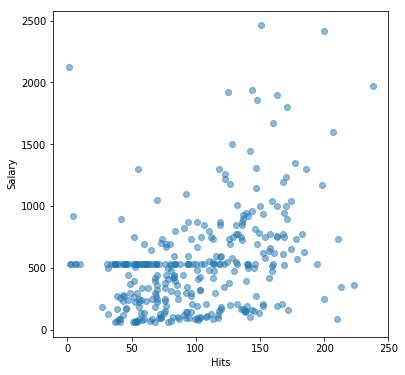

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(train['Hits'], train['Salary'], alpha=0.5)

ax.set_ylabel('Salary')
ax.set_xlabel('Hits')

plt.show()

#### Apply Linear Regression on the Hitters data to predict 'Salary' depending only on 'Hits' as the independent variable. Print out the slope and intercept coefficients.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into 70/30 train/test datasets
target = 'Salary'
features = 'Hits'

X = train[features].values
y = train[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

# Fit linear regression model
lr = LinearRegression(normalize=False).fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1) )

# Print the slope and intercept
print("Model: intercept = %.2f, slope = %.2f" % (lr.intercept_, lr.coef_[0]))

Model: intercept = 234.48, slope = 3.10


#### Compute the RMSE of the model obtained above

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred_lr_train = lr.predict(X_train.reshape(-1, 1))
y_pred_lr_test = lr.predict(X_test.reshape(-1, 1))

#Compute the RMSE 
rmse_lr_train = sqrt(mean_squared_error(y_train, y_pred_lr_train))
rmse_lr_test = sqrt(mean_squared_error(y_test, y_pred_lr_test))

print("Root Mean Squared Error: train set = %.1f, test set = %.1f" % (rmse_lr_train, rmse_lr_test))

Root Mean Squared Error: train set = 404.7, test set = 299.0


#### Graph the linear regression model obtained on the data

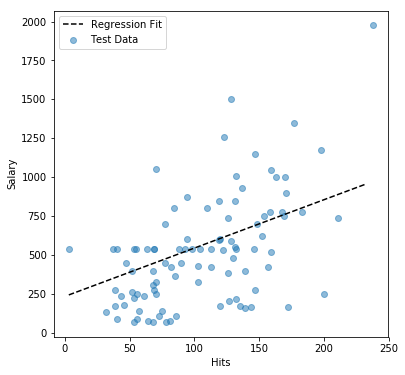

In [8]:
import numpy as np

x_values = np.arange(min(X_test), max(X_test), 5)
y_values = lr.predict(x_values.reshape(-1,1))

fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(X_test, y_test, alpha=0.5, label='Test Data')

ax.plot(x_values, y_values, color='black', linestyle='--', label='Regression Fit')

ax.set_ylabel('Salary')
ax.set_xlabel('Hits')

leg = ax.legend()

plt.show()

#### Construct a polynomial regression model with degree 2 to predict 'Salary' depending only on 'Hits' as the independent variable. Compute the RMSE and Plot your result.

Root Mean Squared Error: test set = 293.0


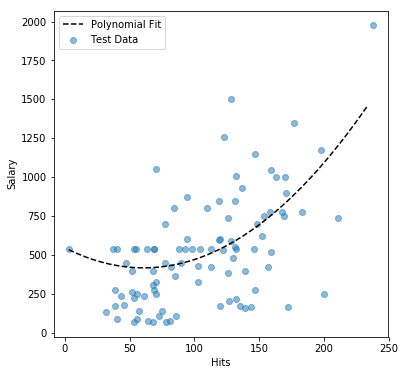

In [9]:
# Generate weights for polynomial function with degree 2
weights = np.polyfit(X_train, y_train, 2)

# Generate model with the given weights
poly_model = np.poly1d(weights)

# Prediction on test set
y_pred_p2_test = poly_model(X_test)

# Compute the RMSE
rmse_p2_test = sqrt(mean_squared_error(y_test, y_pred_p2_test))

print("Root Mean Squared Error: test set = %.1f" % (rmse_p2_test))

# Plot the visualisation
x_values = np.arange(min(X_test), max(X_test), 5)
y_values = poly_model(x_values)

fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(X_test, y_test, alpha=0.5, label='Test Data')

ax.plot(x_values, y_values, color='black', linestyle='--', label='Polynomial Fit')

ax.set_ylabel('Salary')
ax.set_xlabel('Hits')

leg = ax.legend()

plt.show()

####  Create a cubic spline with 3 knots at 40, 100 and 150


Root Mean Squared Error: test set = 331.6


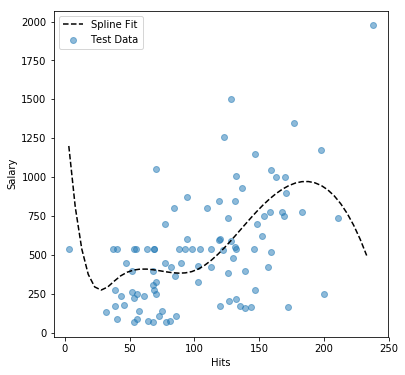

In [10]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate a cubic spline with 3 knots at 40, 100 and 150
transformed_x = dmatrix("bs(X_train, knots=(40, 100, 150), degree=3, include_intercept=False)", 
                        {"train": X_train}, return_type='dataframe')

# Fit a generalized linear models on the transformed dataset
fit_glm = sm.GLM(y_train, transformed_x).fit()

# Prediction
y_pred_3knot_glm_test = fit_glm.predict(dmatrix("bs(valid, knots=(40, 100, 150),degree =3, include_intercept=False)", 
                                                {"valid": X_test}, return_type='dataframe'))

# Compute the RMSE 
rmse_3knot_glm_test = sqrt(mean_squared_error(y_test, y_pred_3knot_glm_test))

print("Root Mean Squared Error: test set = %.1f" % (rmse_3knot_glm_test))

# Plot the visualisation
x_values = np.arange(min(X_test), max(X_test), 5)
y_values = fit_glm.predict(dmatrix("bs(valid, knots=(40, 100, 150),degree =3, include_intercept=False)", 
                                   {"valid": x_values}, return_type='dataframe'))

fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(X_test, y_test, alpha=0.5, label='Test Data')

ax.plot(x_values, y_values, color='black', linestyle='--', label='Spline Fit')

ax.set_ylabel('Salary')
ax.set_xlabel('Hits')

leg = ax.legend()

plt.show()

#### Create a natural cubic spline on the data to predict 'Salary' based on 'Hits'

Root Mean Squared Error: test set = 296.5


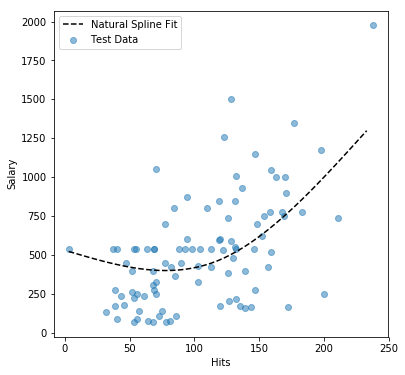

In [11]:
# Generate natural cubic spline
transformed_x = dmatrix("cr(X_train,df = 3)", {"train": X_train}, return_type='dataframe')
fit_spline = sm.GLM(y_train, transformed_x).fit()

# Prediction
y_pred_natural_glm_test = fit_spline.predict(dmatrix("cr(X_test, df=3)", {"test": X_test}, return_type='dataframe'))

# Compute the RMSE 
rmse_natural_glm_test = sqrt(mean_squared_error(y_test, y_pred_natural_glm_test))

print("Root Mean Squared Error: test set = %.1f" % (rmse_natural_glm_test))

# Plot the visualisation
x_values = np.arange(min(X_test), max(X_test), 5)
y_values = fit_spline.predict(dmatrix("cr(x_values, df=3)", {"x_values": x_values}, return_type='dataframe'))

fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(X_test, y_test, alpha=0.5, label='Test Data')

ax.plot(x_values, y_values, color='black', linestyle='--', label='Natural Spline Fit')

ax.set_ylabel('Salary')
ax.set_xlabel('Hits')

leg = ax.legend()

plt.show()

#### Which model performed the best?

In [12]:
preds = {}
preds['Linear Regression']  = rmse_lr_test
preds['Quadratic Fit']      = rmse_p2_test
preds['Spline Fit']         = rmse_3knot_glm_test
preds['Natural Spline Fit'] = rmse_natural_glm_test

for label, rmse in preds.items():
    print('%20s, RMSE = %.1f' % (label, rmse))

   Linear Regression, RMSE = 299.0
       Quadratic Fit, RMSE = 293.0
          Spline Fit, RMSE = 331.6
  Natural Spline Fit, RMSE = 296.5


The non-linear methods perform better than the linear fit, which is expected, due to the non-linear nature of the data. Both the quadratic and natural spline fit have a lower RMSE than the linear fit. Only the spline fit has a worse RMSE. However, that one had the three knots pre-chosen without been calculated from the data.